# numpy 사용 이유

In [1]:
l1 = [1, 2, 3]
l2 = [3, 4, 5]
l3 = l1+l2
print(l3)

[1, 2, 3, 3, 4, 5]


In [2]:
import numpy as np
na1 = np.array([1, 2, 3])
na2 = np.array([3, 4, 5])

na3= na1+na2
print(na3)

[4 6 8]


In [3]:
l1 = [1, 2, 3.0, "hello"]
type(l1[0]), type(l1[1]), type(l1[2]), type(l1[3])

(int, int, float, str)

In [4]:
na1 = np.array([1, 2, 3.0, "hello"])
type(na1[0]), type(na1[1]), type(na1[2]), type(na1[3])

(numpy.str_, numpy.str_, numpy.str_, numpy.str_)

# 군집화 알고리즘 구현해보기

KMeans

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def distance (x1, x2):
  return sum((x1 - x2) ** 2) ** (1/2)

In [7]:
na1 = np.array([1, 2])
na2 = np.array([5, 5])
print(distance(na1,na2))

5.0


In [8]:
def kmeans(data, k=3):
  #data에 있는 원소를 k개의 군집으로 clustering
  colors = ["r", "g", "b"] #군집화 과정을 시각적으로 보여주기 위함(군집별 색상)
  centers=[] #중심점
  plt.figure(figsize = (5, 5))

  for center in range(k): # 단계1, k개의 중심점을 선택 (여기서는 랜덤으로 선택시켰음)
    ci = np.random.randint(len(data))
    centers.append(data[ci])
    plt.plot(data[ci][0], data[ci][1], "ro")

  sx = [x for x, _ in data]
  sy = [y for _, y in data]
  plt.plot(sx, sy, ".")
  plt.show()

  while True : # 단계2, 작업이 끝날때까지 반복
    cs = {} # 군집화할 사전

    for elem in data : # 모든 점들과 k개의 점의 거리를 계산하여 가까운 중심점 군집에 포함시킴
      distances=[] # k개의 중심점과 거리를 계산할 컬렉션

      for i in range(k):
        dis = distance(centers[i], elem) # i번째 중심점과 elem과의 거리계산
        distances.append(dis)
      ai = np.argmin(distances) # 최소 거리인 인덱스(군집 인덱스)를 구하기
      
      if ai not in cs : # 이미 존재하는 군집일 경우
        cs [ai] = [] # 새로운 군집을 추가
      else: # 존재하지 않는 군집일 경우
        cs[ai].append(elem) # 해당 군집에 elem을 추가

    # 그룹의 중심점을 다시 계산
    rcenters = []
    plt.figure(figsize=(5, 5))
    
    for i in range(k):
      sx = np.array([x for x, _ in cs[i]])
      sy = np.array([y for _, y in cs[i]])
      plt.plot(sx, sy, colors[i] + ".")
      plt.plot(centers[i][0], centers[i][1], "yo")
      rcenters.append([sx.mean(), sy.mean()])
      plt.plot(sx.mean(), sy.mean(), colors[i] + "+")
    plt.show()

    if np.array_equal(centers, rcenters): # 만약 중심점이 바뀌지않앗다면
      break
    else: # 바뀌엇다면
      centers = rcenters
  return cs

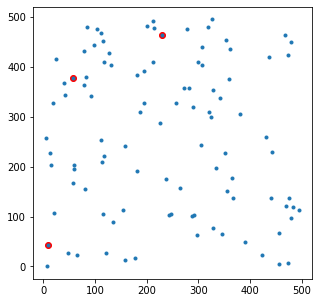

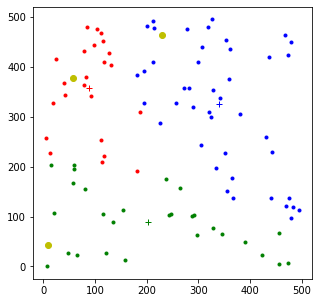

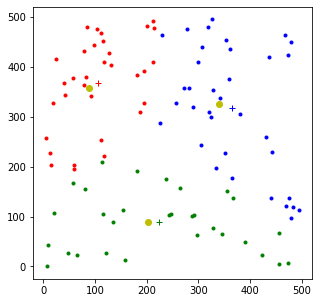

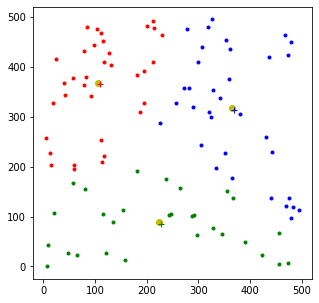

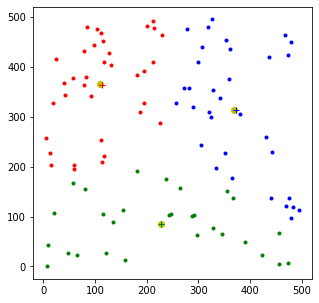

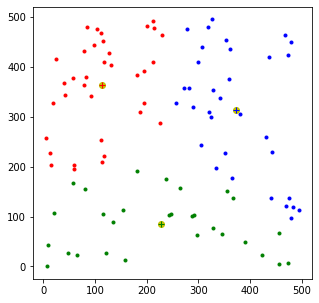

{0: [array([ 85, 479]),
  array([213, 491]),
  array([213, 409]),
  array([ 57, 378]),
  array([104, 476]),
  array([ 82, 380]),
  array([181, 384]),
  array([118, 221]),
  array([ 14, 228]),
  array([200, 481]),
  array([ 43, 343]),
  array([ 99, 444]),
  array([ 92, 341]),
  array([  5, 257]),
  array([ 79, 364]),
  array([ 78, 431]),
  array([ 16, 203]),
  array([225, 287]),
  array([111, 467]),
  array([ 19, 328]),
  array([111, 254]),
  array([230, 464]),
  array([ 41, 367]),
  array([194, 391]),
  array([127, 428]),
  array([ 24, 416]),
  array([ 59, 196]),
  array([195, 327]),
  array([214, 478]),
  array([ 59, 203]),
  array([117, 410]),
  array([132, 403]),
  array([115, 452]),
  array([113, 209]),
  array([188, 310])],
 1: [array([ 80, 155]),
  array([48, 27]),
  array([390,  49]),
  array([ 58, 167]),
  array([291, 103]),
  array([ 21, 108]),
  array([181, 192]),
  array([366, 137]),
  array([159,  13]),
  array([329,  78]),
  array([66, 23]),
  array([155, 114]),
  array([4

In [9]:
n = 100
data = np.array([[ np.random.randint(0,500), np.random.randint(0,500)] for _ in range(n)])
kmeans(data)

# 독립 변수의 종속 변수의 관계가 비선형으로 예측 가능할때
underfit 현상이 발생할때

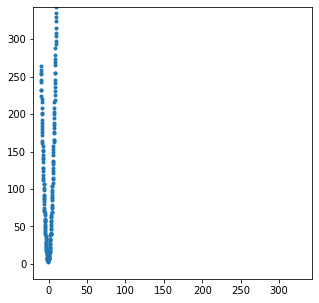

In [10]:
xs = [x/10 for x in range(-100, 100)] # -10-10, step :0.1
ys = [3 * (x ** 2) + 4 * x + 7 + np.random.uniform(-3, 3) for x in xs]
plt.figure(figsize = (5, 5))
plt. plot(xs, ys, ".")
plt.xlim([-20, max(ys)])
plt.ylim([-20, max(ys)])
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
xs2 = [[x] for x in xs]
train_xs, test_xs, train_ys, test_ys = train_test_split(xs2, ys)

In [13]:
model = LinearRegression()
model.fit(train_xs, train_ys)
print(model.coef_, model.intercept_)

[2.44180109] 112.63426426932286


In [14]:
xs3 = [[x, x ** 2] for x in xs]
train_xs2, test_xs2, train_ys2, test_ys2 = train_test_split(xs3, ys)

In [15]:
model = LinearRegression()
model.fit(train_xs2, train_ys2)
print(model.coef_, model.intercept_)
print(model.score(train_xs2, train_ys2))
print(model.score(test_xs2, test_ys2))

[3.99334821 2.99804359] 7.146002851088497
0.9996064441183424
0.9996602764706695


In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
data = [[1, 2, 3], [4, 5, 6]]
poly = PolynomialFeatures(degree=3)
poly.fit([[1, 1, 1]])
td = poly.transform(data)
td

array([[  1.,   1.,   2.,   3.,   1.,   2.,   3.,   4.,   6.,   9.,   1.,
          2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,   6.,  16.,  20.,  24.,  25.,  30.,  36.,  64.,
         80.,  96., 100., 120., 144., 125., 150., 180., 216.]])

In [18]:
fpath = "/content/sample_data/train_titanic.csv"

In [19]:
import pandas as pd

In [20]:
data = pd.read_csv(fpath)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


결측치 확인

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1. 총 인원수, 생존자, 사망자가 몇 명일지 구하기

In [23]:
sur_data = data["Survived"]
sur_data.value_counts()

0    549
1    342
Name: Survived, dtype: int64

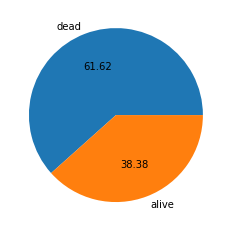

In [24]:
vc = sur_data.value_counts()
plt.pie(vc.values, labels = ["dead", "alive"], autopct = "%.2f")
plt.show()

2. 결측데이터가 있는 컬럼을 조사

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
data["Age"].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [27]:
data["Cabin"].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [28]:
data["Embarked"].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

3. Pclass 값의 종류를 확인

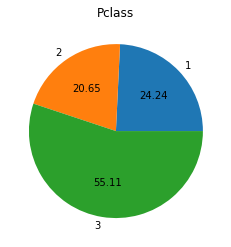

1    216
2    184
3    491
Name: Pclass, dtype: int64


In [29]:
p_data = data["Pclass"]
pvc = p_data.value_counts().sort_index()
plt.pie(pvc.values, labels=pvc.index, autopct="%.2f")
plt.title("Pclass")
plt.show()
print(pvc)

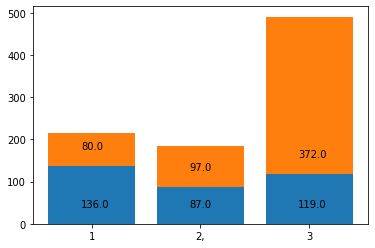

[136.  87. 119.]
[ 80.  97. 372.]


In [30]:
pc_alive_arr = np.zeros(len(p_data.unique()))
pc_dead_arr = np.zeros(len(p_data.unique()))
for i in range(len(p_data)):
  pi = p_data[i]-1 # 1->0, 2->1, 3->2 (클래스를 인덱스로 변환)

  if sur_data[i] ==0:
    pc_dead_arr[pi]+=1
  else:
    pc_alive_arr[pi]+=1

plt.bar(["1", "2,", "3"], pc_alive_arr)
plt.bar(["1", "2,", "3"], pc_dead_arr, bottom = pc_alive_arr)
for i in range(3):
  plt.annotate(str(pc_alive_arr[i]), (i-0.1, 40))
  plt.annotate(str(pc_dead_arr[i]), (i-0.1, pc_alive_arr[i]+40))
plt.show()
print(pc_alive_arr)
print(pc_dead_arr)

이름으로 특성을 뽑아내기

In [31]:
def get_call_name(name):
  _, second = name.split(",")
  foos = second.split(".")
  return str.replace(foos[0], " ", "")

In [32]:
name_values = ["Mr", "Mrs", "Miss", "Master", "Dr", "ETC"]
def get_ni(cn):
  for index in range(5):
    if cn == name_values[index]:
      return index
  return 5

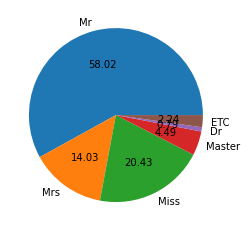

Mr      :517, 081, 436 
Mrs     :125, 099,  26 
Miss    :182, 127,  55 
Master  :040, 023,  17 
Dr      :007, 003,   4 
ETC     :020, 009,  11 


In [33]:
n_data = data['Name']
n_cnts = np.zeros(6,dtype=np.int32) #호칭별 승객수를 카운팅하여 보관할 컬렉션

pn_alive_arr = np.zeros(6,dtype=np.int32)
pn_dead_arr = np.zeros(6,dtype=np.int32)

for i,nd in enumerate(n_data):
  cn = get_call_name(nd)
  ni = get_ni(cn)
  n_cnts[ni] += 1

  if sur_data[i]==0:
    pn_dead_arr[ni]+=1
  else:
    pn_alive_arr[ni]+=1

plt.pie(n_cnts,labels=name_values,autopct='%.2f')
plt.show()

for i,cn in enumerate(name_values):
  print(f"{name_values[i]:8s}:{n_cnts[i]:03d}, {pn_alive_arr[i]:03d}, {pn_dead_arr[i]:3d} ")

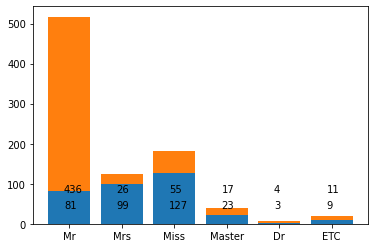

[ 81  99 127  23   3   9]
[436  26  55  17   4  11]


In [34]:
plt.bar(name_values, pn_alive_arr)
plt.bar(name_values, pn_dead_arr, bottom=pn_alive_arr)

for i in range(6):
  plt.annotate(str(pn_alive_arr[i]), (i-0.1, 40))

  if pn_alive_arr[i]<40:
    plt.annotate(str(pn_dead_arr[i]), (i-0.1, 80))
  else:
    plt.annotate(str(pn_dead_arr[i]), (i-0.1, 80))
plt.show()
print(pn_alive_arr)
print(pn_dead_arr)

나이 결측값은 평균 나이로 처리

나이를 5살 범위로 나누어 분포를 조사

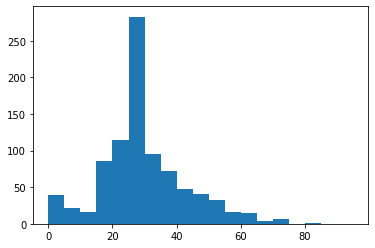

[ 40.  22.  16.  86. 114. 283.  95.  72.  48.  41.  32.  16.  15.   4.
   6.   0.   1.   0.   0.]


In [35]:
a_data = data["Age"]
a_data = a_data.fillna(a_data.mean()) # 결측값을 평균 나이로
n, _, _ = plt.hist(a_data, bins = [age for age in range(0, 100, 5)])
plt.show()
print(n)

# 시엔틱 검색(Text Mining 중에서 TFIDF 방식으로 랭킹)

* 여러개의 문서에서 원하는 내용에 적합한 문서찾기

언휴는 eh 도서관의 사서입니다.

고객이 많아지면서 언휴에게 책을 찾아달라는 요청도 많아졌어요.

이제 원하는 책을 찾는 것을 프로그램으로 제작해 보려고 합니다.

책을 찾을 때 원하는 질의를 입력하면 연관성이 높은지 점수를 부여할 거예요.

점수는 책 내에 질의가 나오는 빈도와 질의의 희귀도를 조합하에 계산합니다.

예를 들어 책 A에 전체 단어 수가 100개이고 질의가 3번 나오면 빈도 점수는 3/100입니다.

빈도 점수 = 질의 빈도/책에 단어 수

전체 책이 50권이고 질의를 포함하는 책이 6권이면 희귀도는 log2(50/(6+1))입니다.

희귀도 = log2((전체 책 수)/(질의 포함 책 수+1))

log2는 밑수가 2인 로그를 의미합니다.

책에 부여하는 연관성 점수는 희귀도 점수가 0일 때는 빈도 점수입니다.

*연관성 점수 = 빈도 점수 * : 희귀도 점수가 0일 때

희귀도 점수가 0이 아닐 때는 빈도 점수 X 희귀도 입니다.

연관성 점수 = 빈도 점수 X 희귀도 :희귀도 점수가 0이 아닐 때

입력은 책 내용 목록(문자열을 원소로 하는 리스트)와 검색 질의(문자열)이 주어집니다.

출력(반환)은 점수 목록입니다.

단어는 공백을 기준으로 구분합니다.

입력: ["abc korea bbc dde zzz","abc hello yahoo","korea python korea yahoo abc","hello korea","yahoo","hello","world"],"korea"

출력: [0.11192315758708454, 0.0, 0.22384631517416909, 0.27980789396771133, 0.0, 0.0, 0.0]


In [36]:
import math
from collections import Counter

In [37]:
def ranking(books, query):
  dcnt = len(books)
  tfs = np.zeros(dcnt) # tf 점수를 보관할 컬렉션
  dref = 0 # 문서 참조 개수
  
  for index in range(dcnt):
    words = books[index].split(" ") # 공백으로 구분(단어별로 나누기)
    tcnt = len(words) # 단어 갯수

    for word, rcnt in Counter(words).items():
      if word ==query:
        tfs[index] = rcnt/tcnt # index 번째 책의 tf 점수를 부여
        dref += 1
        break # 같은 단어가 있을 턱이 없으니 루프를 탈출

  idf = math.log(dcnt/(dref+1))
  return (tfs*idf).tolist()

In [38]:
ranking(["abc korea bbc dde zzz","abc hello yahoo","korea python korea yahoo abc","hello korea","yahoo","hello","world"],"korea")

[0.11192315758708454,
 0.0,
 0.22384631517416909,
 0.27980789396771133,
 0.0,
 0.0,
 0.0]

In [39]:
import cv2
cv2.__version__

'4.1.2'

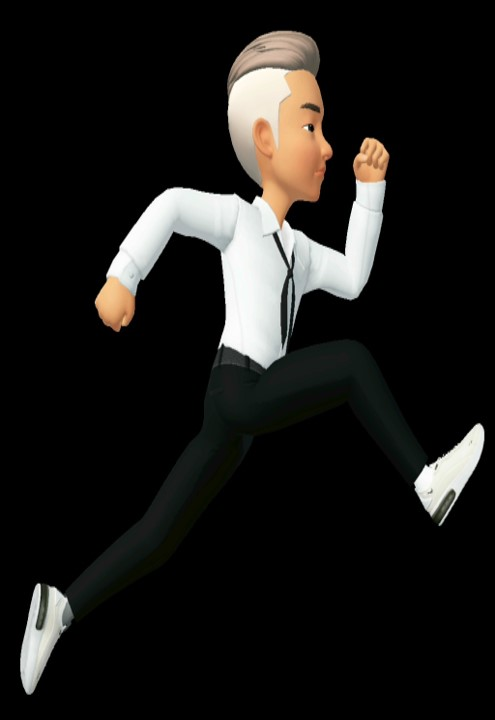

In [40]:
path = "/content/KakaoTalk_20220401_142228809.jpg"
from google.colab.patches import cv2_imshow
image = cv2.imread(path,cv2.IMREAD_COLOR)
cv2_imshow(image)

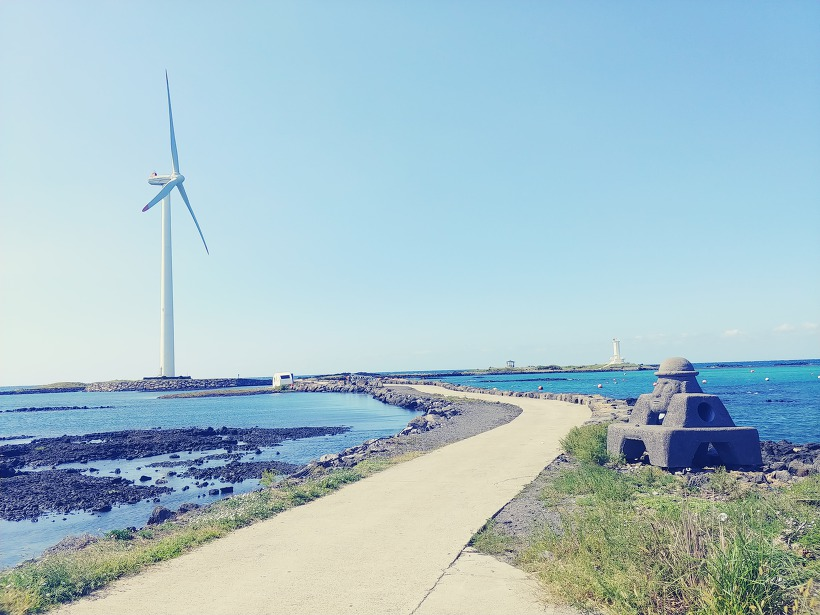

In [74]:
import urllib
url = 'https://t1.daumcdn.net/cfile/tistory/996D34345BBEAD5117'
def load_online_image(url):
  resp = urllib.request.urlopen(url)
  image = np.asarray(bytearray(resp.read()),dtype='uint8')
  image = cv2.imdecode(image,cv2.IMREAD_COLOR)
  return image
image = load_online_image(image_url)
cv2_imshow(image)

* 이미지 그리기

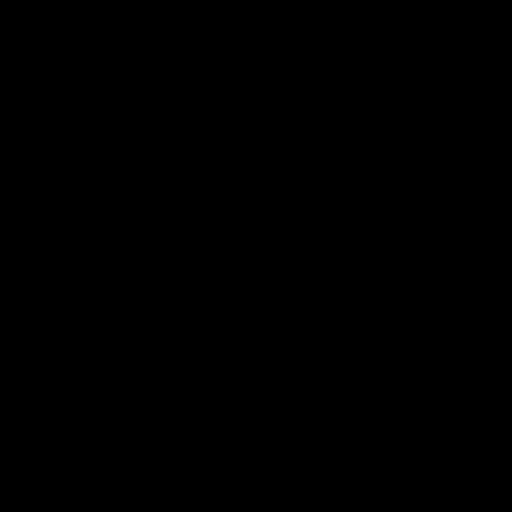

In [44]:
image = np.zeros((512, 512, 3), np.uint8) # 높이 512, 너비 512, 채널:3(컬러 blue,green, red), 1pixel:0~255
cv2_imshow(image)

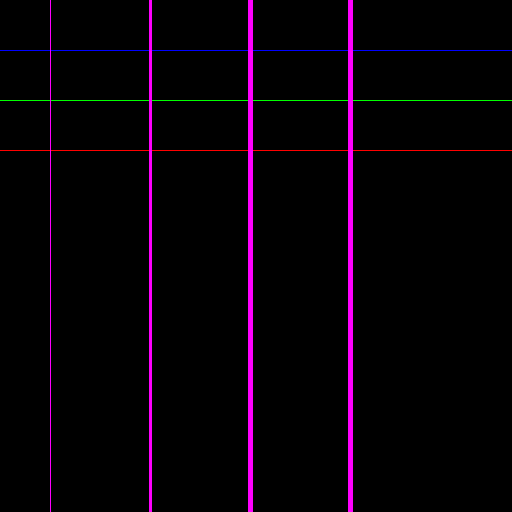

In [45]:
cv2.line(image, (0, 50), (512, 50), (255, 0, 0)) # 좌표(0, 50)에서 (512, 50)으로 이어지는 Blue 선을 그리기
cv2.line(image, (0, 100), (512, 100), (0, 255, 0)) # 좌표(0, 100)에서 (512, 100)으로 이어지는 Green 선을 그리기
cv2.line(image, (0, 150), (512, 150), (0, 0, 255)) # 좌표(0, 150)에서 (512, 150)으로 이어지는 Red 선을 그리기
cv2.line(image, (50, 0), (50, 512), (255, 0, 255), 1) # 보라색 수직선 두께 : 1
cv2.line(image, (150, 0), (150, 512), (255, 0, 255), 2) # 보라색 수직선 두께 : 2
cv2.line(image, (250, 0), (250, 512), (255, 0, 255), 3) # 보라색 수직선 두께 : 3
cv2.line(image, (350, 0), (350, 512), (255, 0, 255), 4) # 보라색 수직선 두께 : 4
cv2_imshow(image)

* 연산

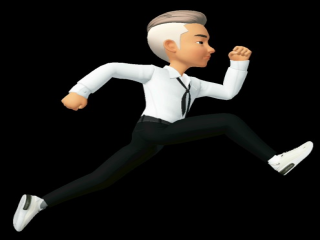

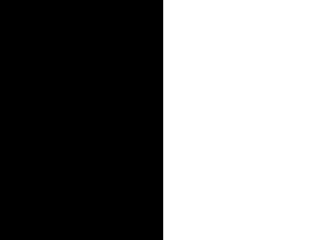

In [46]:
b_path = '/content/sample_data/KakaoTalk_20220401_144303196.png'
image1 = cv2.imread(path, cv2.IMREAD_COLOR)
image1 = cv2.resize(image1, dsize=(320, 240), interpolation=cv2.INTER_AREA)
image2 = cv2.imread(b_path, cv2.IMREAD_COLOR)
image2 = cv2.resize(image2, dsize=(320, 240), interpolation=cv2.INTER_AREA)
cv2_imshow(image1)
cv2_imshow(image2)

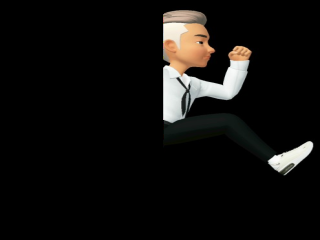

In [47]:
and_image = cv2.bitwise_and(image1, image2)
cv2_imshow(and_image)

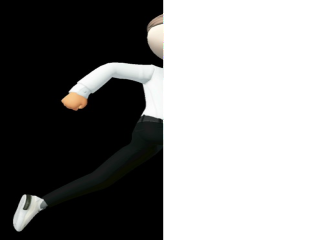

In [48]:
or_image = cv2.bitwise_or(image1, image2)
cv2_imshow(or_image)

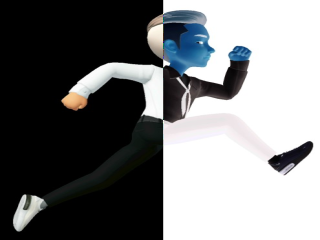

In [49]:
xor_image = cv2.bitwise_xor(image1, image2)
cv2_imshow(xor_image)

* 색상 공간 변형

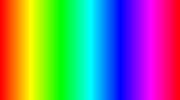

In [50]:
image = np.zeros((100, 180, 3), np.uint8)

for i in range(0, 180):
  image[:, i, 0] = i
  
image[:, :, 1] = 255
image[:, :, 2] = 255
img = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
cv2_imshow(img)

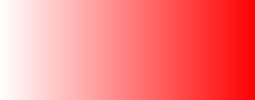

In [51]:
image = np.zeros((100, 255 ,3), np.uint8)
image[:, :, 0] = 0 # 색조 0(RED)

for i in range(0, 255):
  image[:, i, 1] = i # 채도를 순차적으로 부여
  
image[:, :, 2] = 255 # 밝기는 최대
img = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
cv2_imshow(img)

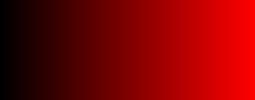

In [52]:
image = np.zeros((100, 255, 3), np.uint8)
image[:, :, 0] = 0 #색조 0(RED)
image[:, :, 1] = 255 #채도를 최대

for i in range(0,255):  
  image[:, i, 2] = i #밝기는 순차적으로 부여
  
img = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
cv2_imshow(img)

* 효과를 사용하여 숫자있는 부분 추출

In [53]:
npath = '/content/sample_data/KakaoTalk_20220401_151418114.png'

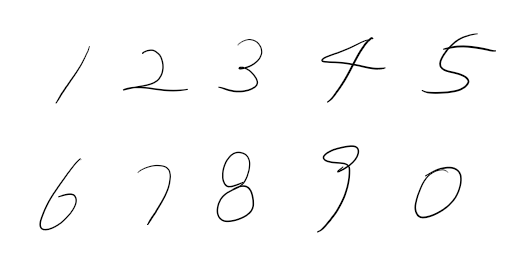

In [54]:
src_image = cv2.imread(npath, cv2.IMREAD_COLOR)
cv2_imshow(src_image)

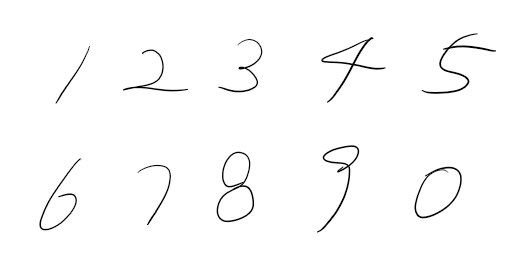

(259, 532, 3)


In [55]:
cpy_image = src_image.copy()
gray_image = cv2.cvtColor(src_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)
print(cpy_image.shape)

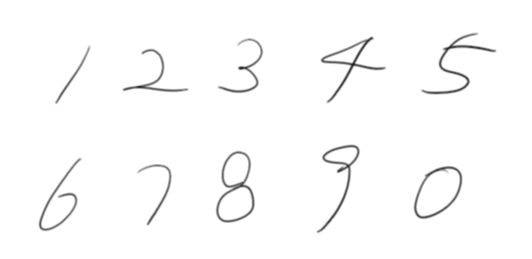

In [56]:
blur_image = cv2.GaussianBlur(gray_image, (3, 3), 0)
cv2_imshow(blur_image)

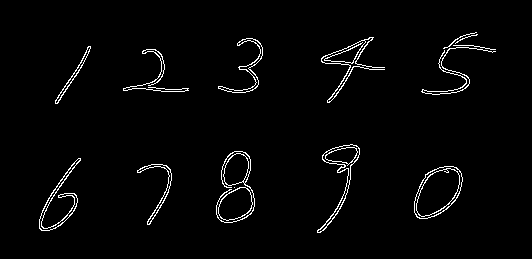

In [57]:
canny_image = cv2.Canny(blur_image,100, 200)
cv2_imshow(canny_image)

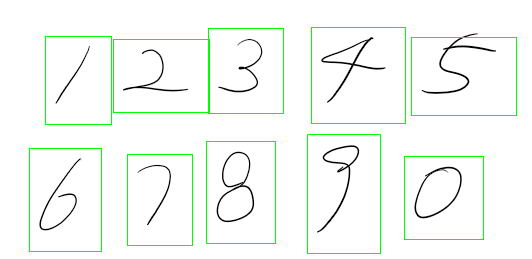

In [58]:
contours, _ = cv2.findContours(canny_image, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
stroe_xywh=[]

for contour in contours:
  x, y, w, h = cv2.boundingRect(contour)
  flag = False

  if w >= 30 and h >= 40:
    for sv in stroe_xywh: #이미 있는 영역인지 확인
      gx = abs(sv[0] - x)
      gy = abs(sv[1] - y)

      if gx < 5 and gy < 5:
        flag = True #이미 있는 영역
        break

  else:
    flag = True #너비와 높이가 만족하지 않을 때 무시

  if flag == False: #없으면서 크기를 만족할 때
    stroe_xywh.append([x, y, w, h]) 

for sv in stroe_xywh:
  x, y, w, h = sv
  cv2.rectangle(src_image, (x -1 0, y - 10), (x + w + 20, y + h + 20), (0, 255, 0), 1)

cv2_imshow(src_image)

# 손글씨 인식

In [59]:
from tensorflow import keras

In [60]:
data = keras.datasets.mnist.load_data()
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [61]:
train_data, test_data = data

In [62]:
train_input, train_label = train_data

In [63]:
test_input, test_label = test_data

In [64]:
train_input.shape, train_label.shape

((60000, 28, 28), (60000,))

In [65]:
print(train_label[7])

for r in range(28):
  for c in range(28):
    if(train_input[7][r][c] != 0):
      print('■', end = '')
    else:
      print('  ', end = '')
  print()

cv2_imshow(train_input[7])

3
                                                        
                                                        
                                                        
                                                        
                                                        
                      ■■■■■■■■■■■            
                  ■■■■■■■■■■■■■■          
                  ■■■■■■■■■■■■■■          
                  ■■■■■■■■■■■■■■          
                  ■■■■        ■■■■■■          
                                  ■■■■■            
                                ■■■■■■            
                            ■■■■■■■■            
                  ■■■■■■■■■■■■              
                ■■■■■■■■■■■                  
                ■■■■■■■■■■■■                
                  ■■■■■■■■■■■                
                                ■■■■                
                                ■■■■                
            ■■■            ■■■■■                
  

In [66]:
from keras.utils import np_utils

In [67]:
train_label2 = np_utils.to_categorical(train_label) # 다중 분류를 위해 수치형 데이터를 범주형 데이터로 변환
test_label2 = np_utils.to_categorical(test_label) # 다중 분류를 위해 수치형 데이터를 범주형 데이터로 변환
train_label[0], train_label2[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [68]:
train_input2 = train_input.reshape(-1, 28 * 28) # DNN에 독립변수로 사용할 수 있게 하기 위해 구조 변환
test_input2 = test_input.reshape(-1, 28 * 28)
train_input2.shape, train_input.shape

((60000, 784), (60000, 28, 28))

In [69]:
train_input3 = train_input2/255.0  # 모든 특성 값을 0~1 사이로 보정
test_input3 = test_input2/255.0  # 모든 특성 값을 0~1 사이로 보정

In [70]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, activation = 'relu', input_shape=(784, )))
model.add(keras.layers.Dense(28, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax')) # 최종 Dense의 활성화 함수는 다중분류 목적일 때는 softmax
model.compile(loss = 'categorical_crossentropy') #, optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 28)                2828      
                                                                 
 dense_2 (Dense)             (None, 10)                290       
                                                                 
Total params: 81,618
Trainable params: 81,618
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.fit(train_input3, train_label2, epochs=15, validation_split = 0.2)

Epoch 1/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3065 - val_loss: 0.1631
Epoch 2/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1411 - val_loss: 0.1332
Epoch 3/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1012 - val_loss: 0.1219
Epoch 4/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0828 - val_loss: 0.1178
Epoch 5/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0681 - val_loss: 0.1154
Epoch 6/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0581 - val_loss: 0.1192
Epoch 7/15
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0501 - val_loss: 0.1210
Epoch 8/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0428 - val_loss: 0.1330
Epoch 9/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0394 - val_loss: 0.1330
Epoch 10/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.03

In [72]:
score = model.evaluate(train_input3, train_label2)
print(score)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0443
0.04433206841349602


In [73]:
score = model.evaluate(test_input3 ,test_label2)
print(score)

313/313 [==============================] - 1s 2ms/step - loss: 0.1364
0.13636307418346405
